# Python 기초 통계 - Day1 - Assignment

**💡[ 학습 목표 ]**

1. pandas 로 데이터 불러오기 
2. 데이터 전처리 실습 (pandas, numpy) 
3. 간단한 시각화 실습 (matplotlib, seaborn)
4. 데이터 EDA 실습 (pandas profiling) 
5. github 계정 생성, github fork, pull request 1일차 과제 제출 
(※github의 제출은 선택사항.) 

---
*Copyright(c) 2024 All rights reserved by Hyeonjae Kim*

## 1. Pandas로 데이터 불러오기


In [2]:
# 샘플 데이터: https://www.kaggle.com/datasets/bertiemackie/daily-website-users
import pandas as pd
users = pd.read_csv(r'./data/users.csv')
users.head()

Unnamed: 0        date      measure  value
0           0  2019-01-01  daily_users     67
1           1  2019-01-02  daily_users     51
2           2  2019-01-03  daily_users     58
3           3  2019-01-04  daily_users     71
4           4  2019-01-05  daily_users     28

In [3]:
# Unnamed: 0 이라는 컬럼이 인덱스가 되도록 수정하세요
# === 아래에 코드 작성 === 
users = pd.read_csv(r'./data/users.csv', index_col=0)
users.head()

date      measure  value
0  2019-01-01  daily_users     67
1  2019-01-02  daily_users     51
2  2019-01-03  daily_users     58
3  2019-01-04  daily_users     71
4  2019-01-05  daily_users     28

## 2. 데이터 전처리 실습(pandas, numpy)
- (1) 결측치(Null, NaN) 확인 및 처리 
- (2) 중복값 확인 및 처리 
- (3) 데이터 타입 확인 및 제거
- (4) 데이터 타입 변경 처리 (날짜, 숫자, 범주형, 문자)
- (5) 집계
- (6) 피봇
- (7) concat
- (8) merge



(1) 결측치(Null, NaN) 확인 및 처리

In [4]:
# 샘플 데이터 링크 : https://www.kaggle.com/datasets/webdevbadger/international-student-demographics
# academic.csv데이터 사용.
# 데이터 설명(data description)
# year: The year. The format is YYYY/YY.
# students: The number of students.
# us_students: The number of non-international students.
# undergraduate: The number of undergraduate students.
# graduate: The number of graduate students.
# non_degree: The number of non-degree students.
# opt: The number of OPT students. OPT stands for Optional Practical Training.

academic = pd.read_csv(r'./data/academic.csv')
academic

year  students  us_students  undergraduate  graduate  non_degree  \
0   1948/49     25464    2403400.0            NaN       NaN         NaN   
1   1949/50     26433    2445000.0            NaN       NaN         NaN   
2   1950/51     29813    2281000.0            NaN       NaN         NaN   
3   1951/52     30462    2102000.0            NaN       NaN         NaN   
4   1952/53     33675    2134000.0            NaN       NaN         NaN   
..      ...       ...          ...            ...       ...         ...   
70  2018/19   1095299   19828000.0       431930.0  377943.0     62341.0   
71  2019/20   1075496   19720000.0       419321.0  374435.0     58201.0   
72  2020/21    914095   19744000.0       359787.0  329272.0     21151.0   
73  2021/22    948519   20327000.0       344532.0  385097.0     34131.0   
74  2022/23   1057188   18961280.0       347602.0  467027.0     43766.0   

         opt  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
70  223085.0  
71  223539.0  
72  203885.0  
73  184759.0  
74  198793.0  

[75 rows x 7 columns]

In [5]:
academic.shape

(75, 7)

In [6]:
academic.isna().sum()

year              0
students          0
us_students       3
undergraduate    26
graduate         26
non_degree       31
opt              31
dtype: int64

In [7]:
# dropna를 활용해 결측치 제거하기
# 공식문서: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

# 1) 결측치가 있는 모든 레코드를 제거 하세요 
# === 아래에 코드 작성 === 
# 제거후 shape: (44, 7) 이면 정답

academic.dropna().shape

(44, 7)

In [8]:
# 2) 결측치가 있는 컬럼을 제거 하세요
# === 아래에 코드 작성 === 
# 제거후 shape: (75, 2) 이면 정답
academic.dropna(axis=1).shape

(75, 2)

In [9]:
# 3) 모든 데이터가 결측치인 컬럼을 제거 하세요 
# 제거후 shape: (75, 7) 이고, 코드를 알맞게 썼으면 정답
academic.dropna(axis=1, how='all').shape

(75, 7)

(2) 중복값 확인 및 처리 

In [10]:
import pandas as pd 
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                  'marital-status', 'occupation', 'relationship', 'race', 
                  'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                  'native-country', 'income']
adult_df = pd.read_csv(r'./data/adult.data', names=column_headers)
adult_df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [11]:
# duplicated로 중복 개수 확인하기
adult_df.duplicated().sum()

24

In [12]:
# duplicated로 중복데이터 확인하기 
adult_df[adult_df.duplicated()]

age          workclass  fnlwgt      education  education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital-status          occupation    relationship  \
4881         Never-married        Craft-repair   Not-in-family   
5104         Never-married       Other-service   Not-in-family   
9171         Never-married      Prof-specialty       Own-child   
11631        Never-married        Tech-support   Not-in-family   
13084        Never-married     Priv-house-serv   Not-in-family   
15059        Never-married     Farming-fishing   Not-in-family   
17040   Married-civ-spouse        Craft-repair         Husband   
18555        Never-married       Other-service   Not-in-family   
18698        Never-married     Farming-fishing   Not-in-family   
21318        Never-married        Adm-clerical       Own-child   
21490        Never-married     Exec-managerial       Own-child   
21875   Married-civ-spouse        Craft-repair         Husband   
22300        Never-married     Priv-house-serv   Not-in-family   
22367        Never-married      Prof-specialty   Not-in-family   
22494   Married-civ-spouse        Craft-repair         Husband   
25872        Never-married   Handlers-cleaners   Not-in-family   
26313        Never-married      Prof-specialty   Not-in-family   
28230        Never-married   Machine-op-inspct   Not-in-family   
28522   Married-civ-spouse      Prof-specialty         Husband   
28846   Married-civ-spouse        Craft-repair         Husband   
29157   Married-civ-spouse   Machine-op-inspct         Husband   
30845             Divorced        Adm-clerical       Unmarried   
31993        Never-married       Other-service       Own-child   
32404             Divorced       Other-service   Not-in-family   

                      race      sex  capital-gain  capital-loss  \
4881                 White     Male             0             0   
5104    Asian-Pac-Islander     Male             0             0   
9171                 White   Female             0             0   
11631                White   Female             0             0   
13084                White   Female             0             0   
15059                White     Male             0             0   
17040                White     Male             0             0   
18555                Black     Male         

In [13]:
adult_df.shape

(32561, 15)

In [14]:
# 1) drop_duplicates 를 활용해 중복값 제거하고 shape 확인하기 
# 공식문서: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# === 아래에 코드 작성 === 
# (32537, 15)가 나오면 정답 
adult_df = adult_df.drop_duplicates()
adult_df.shape

(32537, 15)

(3) 데이터 타입 확인 및 제거

In [15]:
# 샘플 데이터: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
import pandas as pd 
insurance_df = pd.read_csv(r'./data/train.csv')
insurance_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

In [16]:
# 1) 아래 코드의 에러 원인을 dtypes를 활용해 파악하고, Gender 기준 평균을 올바르게 구하세요.
# Gender 기준 평균을 구하기 위한 코드
insurance_df.groupby(['Gender']).mean() 

# 힌트: 에러의 원인은 평균을 구할 수 없는 범주형(object) 데이터가 섞여 있기 때문. 

TypeError: Could not convert < 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year> 2 Years> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year> 2 Years< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year> 2 Years> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year> 2 Years1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year> 2 Years< 1 Year< 1 Year1-2 Year< 1 Year> 2 Years1-2 Year< 1 Year1-2 Year< 1 Year< 1 Year1-2 Year< 1 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year> 2 Years< 1 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year1-2 Year1-2 Year1-2 Year1-2 Year< 1 Year< 1 Year< 1 Year1-2 Year1-2 Year1-2 Year> 2 Years1-2 Year< 1 Year> 2 Years< 1 Year> 2 Years to numeric

In [ ]:
insurance_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
# === 아래에 코드 작성 === 
insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).mean() 

Age  Driving_License  Region_Code  Previously_Insured  \
Gender                                                                
Female  36.372746         0.998789    26.380134            0.502508   
Male    40.903095         0.997089    26.396173            0.420590   

        Annual_Premium  Policy_Sales_Channel     Vintage  Response  
Gender                                                              
Female    30495.787990            118.572495  154.575917  0.103902  
Male      30622.649122            106.481763  154.153327  0.138411

(4) 데이터 타입 변경 처리 (날짜, 숫자, 범주형, 문자)

In [17]:
# 앞서 불러온 users 데이터를 활용합니다. 
users.head()

date      measure  value
0  2019-01-01  daily_users     67
1  2019-01-02  daily_users     51
2  2019-01-03  daily_users     58
3  2019-01-04  daily_users     71
4  2019-01-05  daily_users     28

In [18]:
# 1) date의 형태를 확인하는 코드를 작성하고, datetime형태로 변환하고 데이터 타입을 확인하세요. 
# === 아래에 코드 작성 === 
print(users.dtypes)
users['date'] = pd.to_datetime(users['date'])
print(users.dtypes)

date       object
measure    object
value       int64
dtype: object
date       datetime64[ns]
measure            object
value               int64
dtype: object


In [19]:
# 2) year, month 컬럼을 추가하세요. 
# === 아래에 코드 작성 === 
users['year'] = users['date'].dt.year
users['month'] = users['date'].dt.month
users

date      measure  value  year  month
0    2019-01-01  daily_users     67  2019      1
1    2019-01-02  daily_users     51  2019      1
2    2019-01-03  daily_users     58  2019      1
3    2019-01-04  daily_users     71  2019      1
4    2019-01-05  daily_users     28  2019      1
...         ...          ...    ...   ...    ...
1092 2021-12-28  daily_users     98  2021     12
1093 2021-12-29  daily_users     91  2021     12
1094 2021-12-30  daily_users     70  2021     12
1095 2021-12-31  daily_users     75  2021     12
1096 2022-01-01  daily_users     50  2022      1

[1097 rows x 5 columns]

In [20]:
# 3) value컬럼의 형태(int)를 float으로 변경하고 확인하는 코드를 작성하세요. 
# === 아래에 코드 작성 === 
users.dtypes
users['value'] = users['value'].astype(float)
print(users.dtypes)
users.head()

date       datetime64[ns]
measure            object
value             float64
year                int32
month               int32
dtype: object


date      measure  value  year  month
0 2019-01-01  daily_users   67.0  2019      1
1 2019-01-02  daily_users   51.0  2019      1
2 2019-01-03  daily_users   58.0  2019      1
3 2019-01-04  daily_users   71.0  2019      1
4 2019-01-05  daily_users   28.0  2019      1

(5) 집계 groupby

In [ ]:
# 아래처럼 최빈값(mode)은 groupby에 없는 속성으로 에러가 발생합니다. 
insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).mode()

AttributeError: 'DataFrameGroupBy' object has no attribute 'mode'

In [21]:
# 1) agg와 mode속성을 활용해 위 에러를 해결하세요.
# === 아래에 코드 작성 === 
insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
Gender                                                                          
Female   24                1         28.0                   1          2630.0   
Male     24                1         28.0                   0          2630.0   

        Policy_Sales_Channel  Vintage  Response  
Gender                                           
Female                 152.0      110         0  
Male                   152.0       54         0

## 3. 간단한 시각화 실습(matplotlib, seaborn)
- (1) matplotlib 라이브러리 불러오기 (import) 
- (2) seaborn 라이브러리 불러오기 (import)
- (3) line plot 시각화
- (4) box plot 시각화
- (5) bar plot 시각화
- (6) scatter plot 시각화


In [22]:
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

(1) line plot 시각화

In [26]:
# users 데이터의 2019년만 사용합니다. 
users[users['year']==2019]
users = users[users['year']==2019]


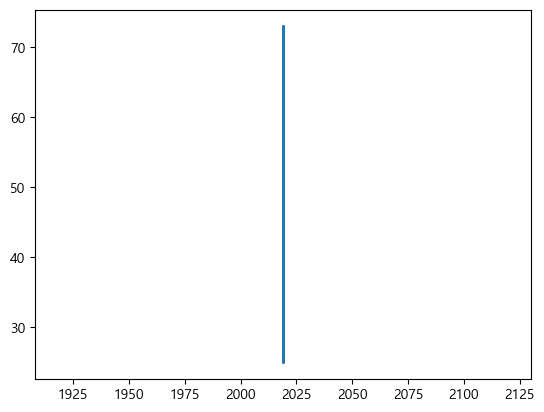

In [29]:

# 1) year를 x축으로 하고, value를 y축으로 하는 line plot을 그리세요. 
# === 아래에 코드 작성 === 
import numpy as np
x = users['year']
y = users['value']

fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 2.0)


plt.show()

(2) box plot 시각화

In [ ]:
# insurance_df 데이터를 사용합니다. 
insurance_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

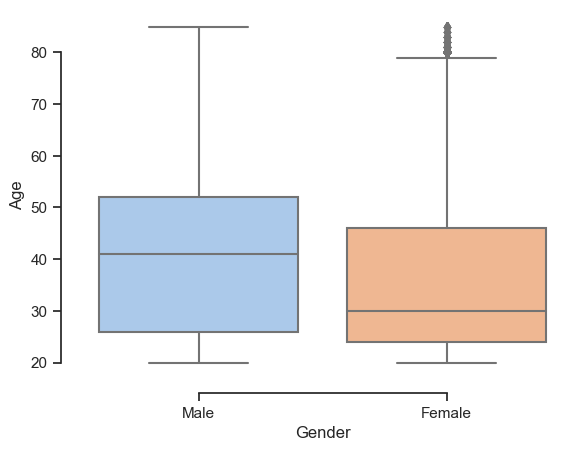

In [30]:
# 1) Gender를 x축으로 하고, Age를 y축으로 하는 boxplot을 그리세요. 
# === 아래에 코드 작성 === 
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="day", y="total_bill",
#             hue="smoker", palette=["m", "g"],
#             data=tips)
# sns.despine(offset=10, trim=True)
sns.boxplot(x='Gender', y='Age', data=insurance_df)
sns.despine(offset=10, trim=True)

(3) bar plot 시각화

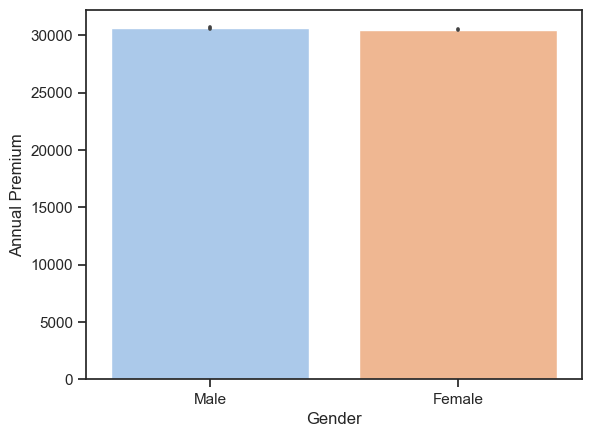

In [31]:
# 1) Gender을 x축으로 하고, Annual Premium을 y축으로 하는 bar plot을 그리세요. 
# === 아래에 코드 작성 === 

sns.barplot(x='Gender', y='Annual_Premium', data=insurance_df)

# 그래프 제목과 라벨 추가
plt.xlabel('Gender')
plt.ylabel('Annual Premium')

plt.show()

(7) regplot 시각화

In [ ]:
# 1) Annual_Premium(x축) Age(y축)의 관계를 확인하세요. 
# === 아래에 코드 작성 === 


## 4. 데이터 EDA 실습 (pandas profiling) 


In [ ]:
# 샘플 데이터 링크 : https://www.kaggle.com/datasets/webdevbadger/international-student-demographics
# academic.csv데이터 사용.
# 데이터 설명(data description)
# year: The year. The format is YYYY/YY.
# students: The number of students.
# us_students: The number of non-international students.
# undergraduate: The number of undergraduate students.
# graduate: The number of graduate students.
# non_degree: The number of non-degree students.
# opt: The number of OPT students. OPT stands for Optional Practical Training.

academic = pd.read_csv(r'C:\Users\user\project\구글 드라이브 백업\KDT강의\7기 Python 기초 통계\강의교안\Day1\international_student\academic.csv')
academic

year  students  us_students  undergraduate  graduate  non_degree  \
0   1948/49     25464    2403400.0            NaN       NaN         NaN   
1   1949/50     26433    2445000.0            NaN       NaN         NaN   
2   1950/51     29813    2281000.0            NaN       NaN         NaN   
3   1951/52     30462    2102000.0            NaN       NaN         NaN   
4   1952/53     33675    2134000.0            NaN       NaN         NaN   
..      ...       ...          ...            ...       ...         ...   
70  2018/19   1095299   19828000.0       431930.0  377943.0     62341.0   
71  2019/20   1075496   19720000.0       419321.0  374435.0     58201.0   
72  2020/21    914095   19744000.0       359787.0  329272.0     21151.0   
73  2021/22    948519   20327000.0       344532.0  385097.0     34131.0   
74  2022/23   1057188   18961280.0       347602.0  467027.0     43766.0   

         opt  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
70  223085.0  
71  223539.0  
72  203885.0  
73  184759.0  
74  198793.0  

[75 rows x 7 columns]

In [ ]:
# 1) 데이터의 형태(shape)를 확인하세요. 
# === 아래에 코드 작성 === 


In [ ]:
# 2) 각 컬럼들의 데이터 형태(type)를 확인하세요. 
# === 아래에 코드 작성 === 


In [ ]:
# 3) 각 컬럼들의 결측치 개수를 확인하세요.
# === 아래에 코드 작성 === 


In [ ]:
# 4) 결측치가 있을 경우, 0으로 채우고 결측치가 없는지 다시 확인하세요. 
# === 아래에 코드 작성 === 


In [ ]:
# 5) str.split을 사용해 year 값만 추출한 새로운 컬럼을 만드세요. 
# === 아래에 코드 작성 === 


In [ ]:
# 6) groupby를 사용하여 students 컬럼의 연도별(year) 평균, 최소, 최대, 합계를 구하세요. 
# === 아래에 코드 작성 === 
# 각 집계 결과를 개별로 groupby 하여 merge해도 수치가 맞으면 정답.

In [ ]:
# 7) pandas profiling 리포트를 만들고 제출하세요. 
# profiling 설치가 안되어 있을경우 아래 코드 실행
# %pip install ydata-profiling

# === 아래에 코드 작성 === 



---
*Copyright(c) 2024 All rights reserved by Hyeonjae Kim*